In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv("/content/TSLA.csv")

In [7]:

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [8]:
data.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


In [9]:
data['Date']

,Date
0,2010-06-29
1,2010-06-30
2,2010-07-01
3,2010-07-02
4,2010-07-06
...,...
2951,2022-03-18
2952,2022-03-21
2953,2022-03-22
2954,2022-03-23


In [10]:
import datetime

def object_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = object_to_datetime('2010-06-29')
datetime_object

datetime.datetime(2010, 6, 29, 0, 0)

In [11]:
data['Date'] = data['Date'].apply(object_to_datetime)
data['Date']

,Date
0,2010-06-29
1,2010-06-30
2,2010-07-01
3,2010-07-02
4,2010-07-06
...,...
2951,2022-03-18
2952,2022-03-21
2953,2022-03-22
2954,2022-03-23


In [12]:
df=data.copy()

In [13]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2951,2022-03-18,905.390015
2952,2022-03-21,921.159973
2953,2022-03-22,993.979980
2954,2022-03-23,999.109985


In [14]:
df.index=df["Date"]
df

,Date,Close
Date,,
2010-06-29,2010-06-29,4.778000
2010-06-30,2010-06-30,4.766000
2010-07-01,2010-07-01,4.392000
2010-07-02,2010-07-02,3.840000
2010-07-06,2010-07-06,3.222000
...,...,...
2022-03-18,2022-03-18,905.390015
2022-03-21,2022-03-21,921.159973
2022-03-22,2022-03-22,993.979980


In [15]:
df.drop("Date",axis=1,inplace=True)


In [16]:
df

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


In [14]:
df1=df.copy()


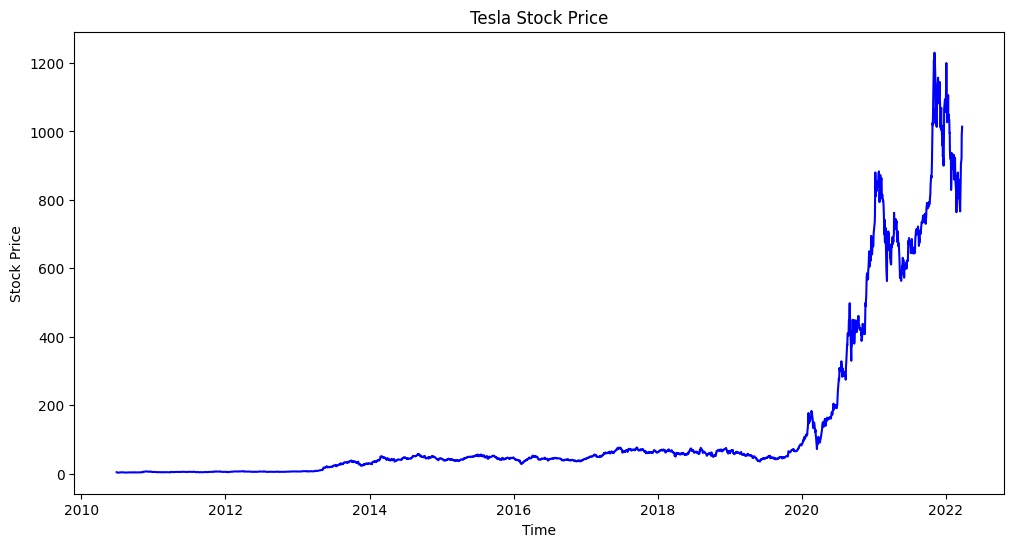

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df1["Close"],color="blue");
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Time")
plt.show()

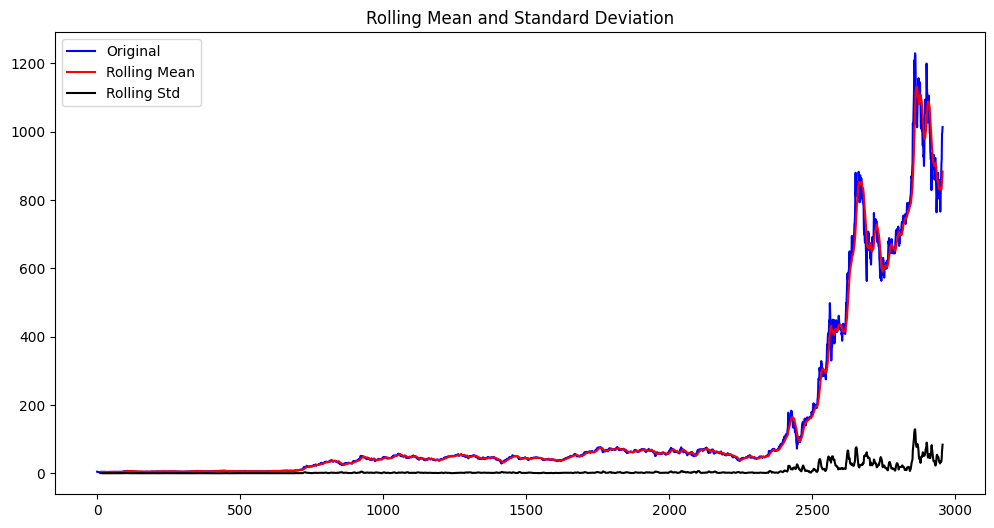

In [63]:
rolling_mean = data['Close'].rolling(window=12).mean()
rolling_std = data['Close'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend()
plt.title("Rolling Mean and Standard Deviation")
plt.show()



## 1) LSTM:


Since LSTM are too sensitive for the scale of the data we're gonna do the MinMax scaler

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [68]:
print(df1)

[[0.00131893]
 [0.00130915]
 [0.00100428]
 ...
 [0.80767879]
 [0.81186057]
 [0.82393312]]


In [72]:
df1 = pd.DataFrame(df1, index=df.index, columns=['Close'])


In [78]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = object_to_datetime(first_date_str)
  last_date  = object_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df1,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,0.543583,0.537192,0.511196,0.519446
1,2021-03-26,0.537192,0.511196,0.519446,0.501773
2,2021-03-29,0.511196,0.519446,0.501773,0.495724
3,2021-03-30,0.519446,0.501773,0.495724,0.515557
4,2021-03-31,0.501773,0.495724,0.515557,0.541895
...,...,...,...,...,...
247,2022-03-17,0.622140,0.651094,0.682348,0.707919
248,2022-03-18,0.651094,0.682348,0.707919,0.735464
249,2022-03-21,0.682348,0.707919,0.735464,0.748319
250,2022-03-22,0.707919,0.735464,0.748319,0.807679


In [79]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

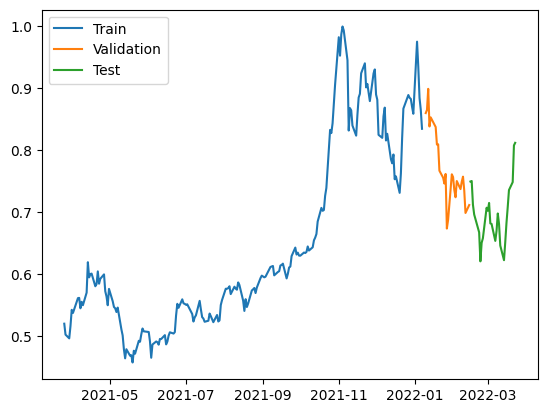

In [80]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [82]:
print(X_train.shape), print(y_train.shape)


(201, 3, 1)
(201,)


(None, None)

In [84]:
print(X_test.shape), print(y_test.shape)


(26, 3, 1)
(26,)


(None, None)

In [85]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [87]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.3648 - mean_absolute_error: 0.5874 - val_loss: 0.3516 - val_mean_absolute_error: 0.5907
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2203 - mean_absolute_error: 0.4511 - val_loss: 0.1664 - val_mean_absolute_error: 0.4053
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0826 - mean_absolute_error: 0.2681 - val_loss: 0.0264 - val_mean_absolute_error: 0.1581
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0817 - val_loss: 0.0083 - val_mean_absolute_error: 0.0851
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179 - mean_absolute_error: 0.1257 - val_loss: 0.0054 - val_mean_absolute_error: 0.0667
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0834 - val_loss: 0.0044 - val_mean_absolute_error: 0.0583
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0513 - val_loss: 0.0084 - v

In [88]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,197 (235.15 KB)

 Trainable params: 20,065 (78.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,132 (156.77 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


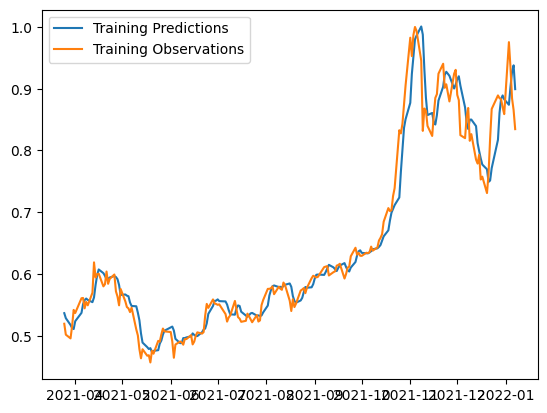

In [90]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


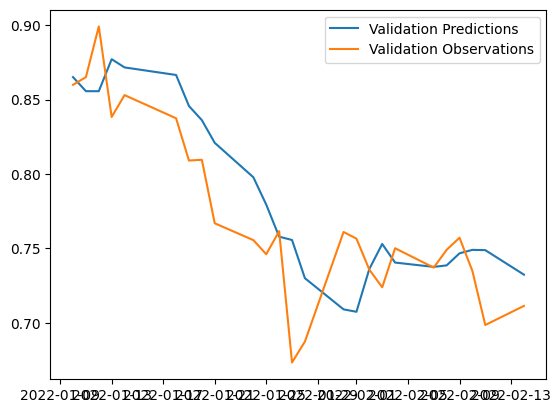

In [91]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


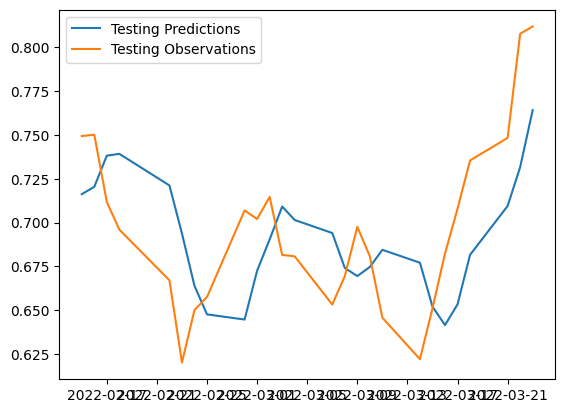

In [92]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

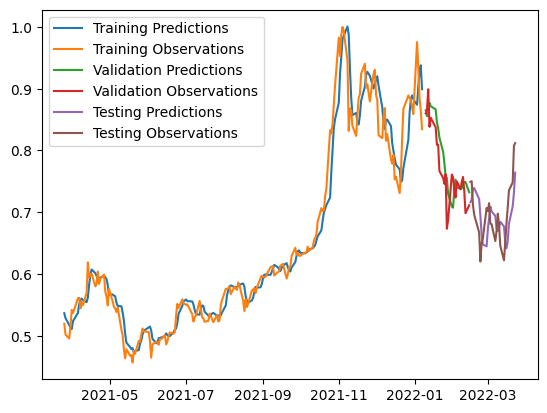

In [93]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

,Date,Close,Predicted
0,2021-03-25,0.519446,0.536593
1,2021-03-26,0.501773,0.528457
2,2021-03-29,0.495724,0.517504
3,2021-03-30,0.515557,0.512445
4,2021-03-31,0.541895,0.510895


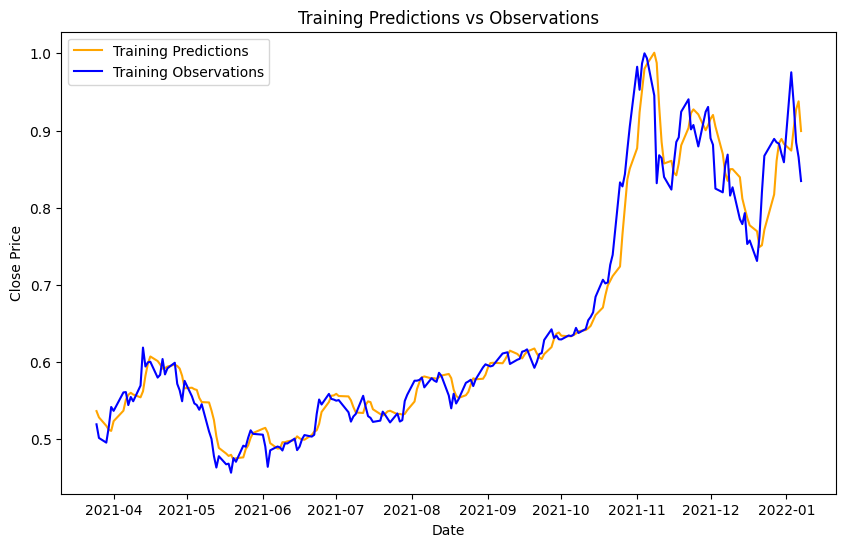

In [97]:
# 1. Créer un DataFrame pour comparer les valeurs réelles et prédites
train_results_df = pd.DataFrame({
    'Date': dates_train,         # Les dates de l'ensemble d'entraînement
    'Close': y_train,            # Les valeurs réelles de fermeture
    'Predicted': train_predictions # Les prédictions
})

# Afficher les 5 premières lignes pour visualiser les résultats
display(train_results_df.head())

# 2. Tracer les prédictions et les observations réelles
plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions, label='Training Predictions', color='orange')
plt.plot(dates_train, y_train, label='Training Observations', color='blue')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Training Predictions vs Observations")
plt.show()

In [111]:
import pandas as pd
import numpy as np

# Initialisation
recursive_predictions = []
sequence = X_train[-1]  # Utilisez la dernière séquence d'entraînement pour démarrer

# Déterminez la longueur de la dernière période
last_period_length = len(X_test)  # Assurez-vous que cela correspond à vos attentes

for _ in range(last_period_length):
    # Faites une prédiction
    prediction = model.predict(sequence[np.newaxis, :, :]).flatten()[0]

    # Ajoutez la prédiction aux prédictions récursives
    recursive_predictions.append(prediction)

    # Mettez à jour la séquence pour la prochaine prédiction
    sequence = np.append(sequence[1:], prediction).reshape(-1, 1)

# Vérifiez la longueur des prédictions
print("Length of recursive_predictions after loop:", len(recursive_predictions))

# Créer un DataFrame avec les dates et les prédictions
# Créez future_dates pour correspondre à la longueur des prédictions
future_dates = pd.date_range(start=dates_train[-1], periods=len(recursive_predictions), freq='D')

# Vérifiez les longueurs avant de créer le DataFrame
print("Length of future_dates:", len(future_dates))

# Assurez-vous que les longueurs correspondent avant de créer le DataFrame
if len(future_dates) == len(recursive_predictions):
    recursive_df = pd.DataFrame({'Date': future_dates, 'Predicted': recursive_predictions})
    display(recursive_df)
else:
    print("Les longueurs des dates futures et des prédictions ne correspondent pas.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Length of re

,Date,Predicted
0,2022-01-07,0.899319
1,2022-01-08,0.885841
2,2022-01-09,0.886986
3,2022-01-10,0.894431
4,2022-01-11,0.892506
5,2022-01-12,0.894949
6,2022-01-13,0.897650
7,2022-01-14,0.898713
8,2022-01-15,0.900875
9,2022-01-16,0.902895


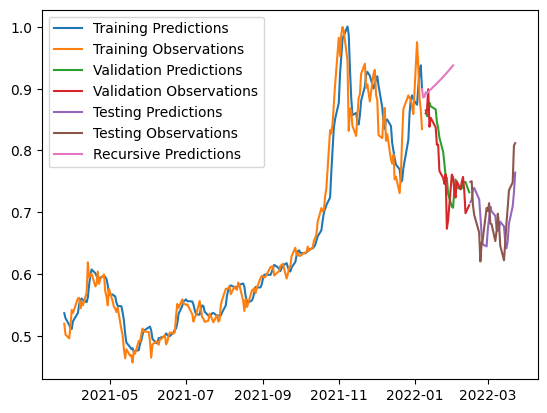

In [112]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(future_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

## 2) ARIMA

In [17]:
df2=df.copy()

In [18]:
df2.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


ADF Test

In [19]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df2.Close.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 1.4239415939225966
p-value: 0.9972202364261444


The time serie here is not stationnary so we need to find the order of differencing

Actually we know in advanced that most of prices are non stationnary cause if not we all be super rich by buying low and selling high.

ACF : Autocorrelation Function

In [20]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

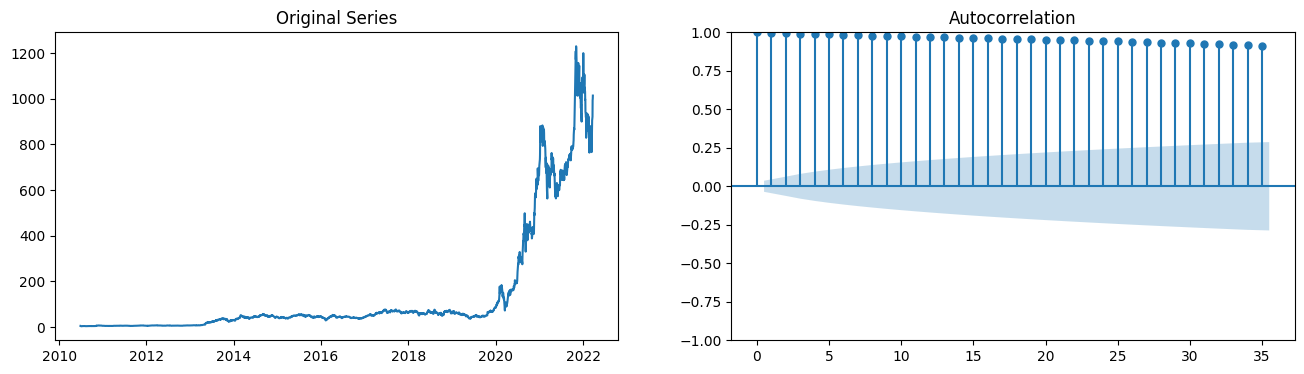

In [21]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(df2.Close)
ax1.set_title("Original Series")
plot_acf(df2.Close,ax=ax2);

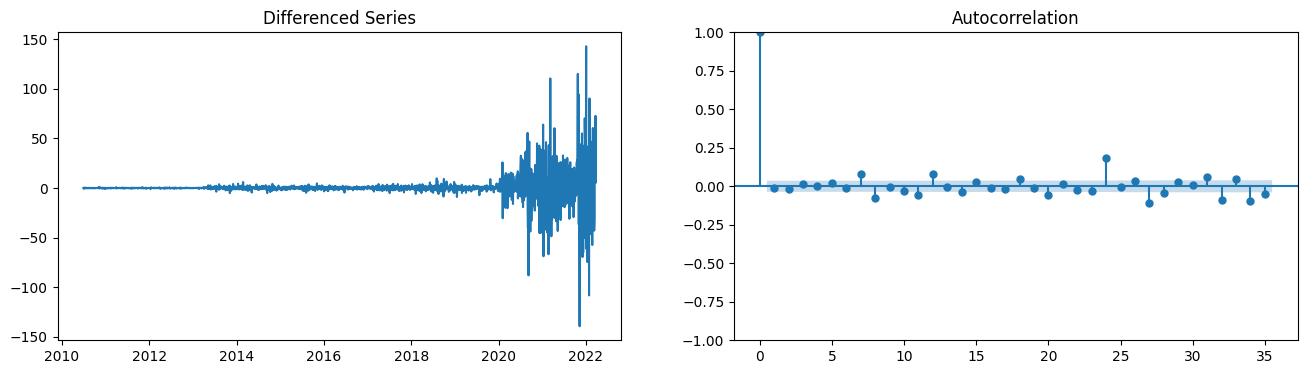

In [22]:
diff =df.Close.diff().dropna()
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Differenced Series")
plot_acf(diff,ax=ax2);

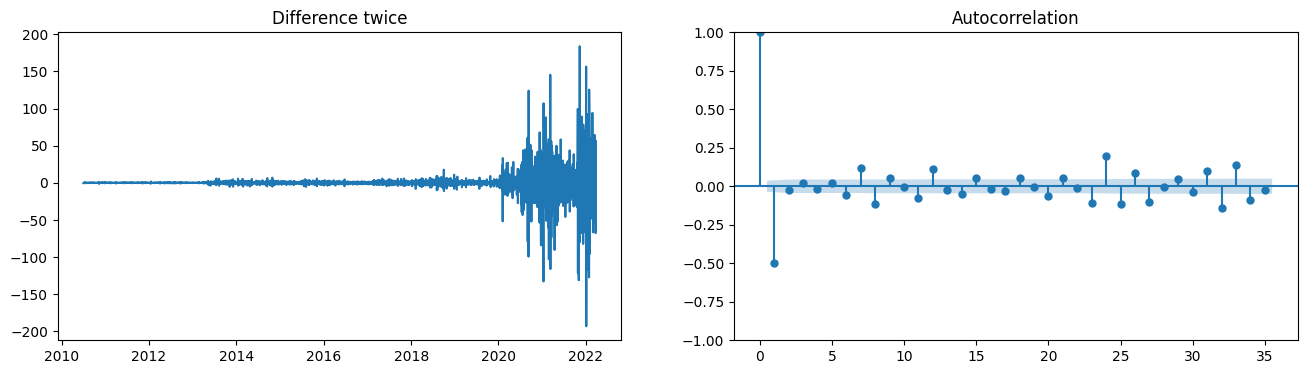

In [23]:
diff =df.Close.diff().diff().dropna()
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff,ax=ax2);

to more precise the number d of differenciation we can use the pmdarima package

In [24]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.2 MB/s eta 0:00:00


In [25]:
from pmdarima.arima.utils import ndiffs

In [26]:
ndiffs(df2.Close , test='adf')

1

here d =1

searching the p now :

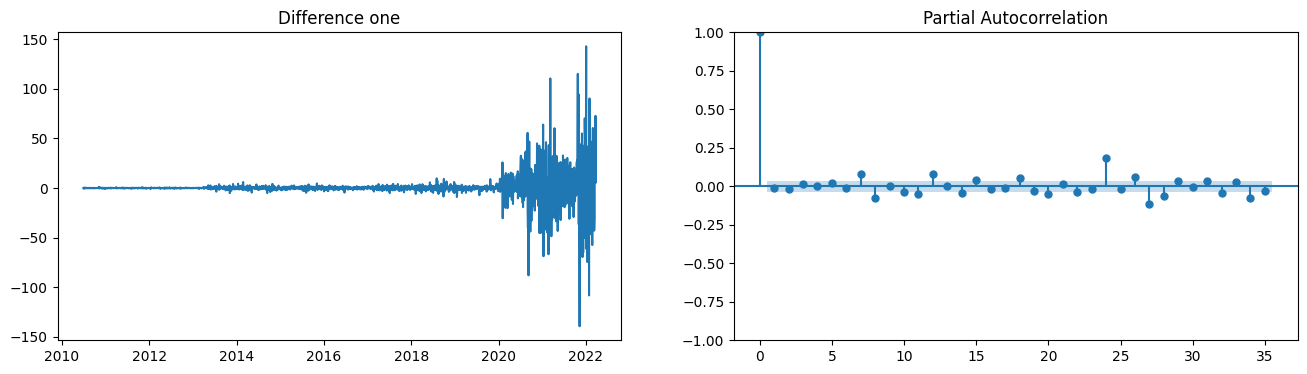

In [27]:
diff = df2.Close.diff().dropna()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference one")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

p=6

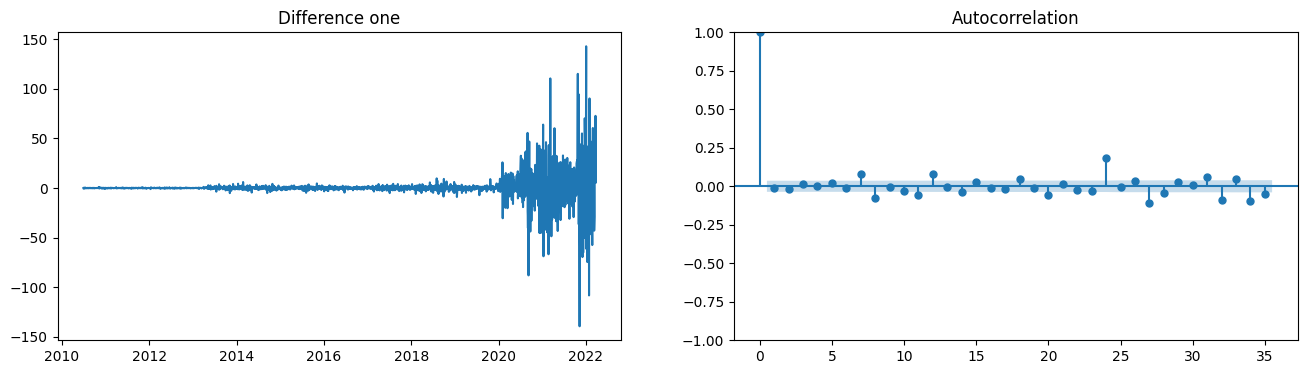

In [28]:
diff = df2.Close.diff().dropna()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference one")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

we choose q=1

Test Train Split

In [29]:
train_size = int(len(df2) * 0.8)
train, test = df2.Close[:train_size], df2.Close[train_size:]

#### Fitting the ARIMA Model

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_train is your training dataset
model = ARIMA(train, order=(6, 1, 1))
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
train.tail()

,Close
Date,
2019-11-11,69.017998
2019-11-12,69.986000
2019-11-13,69.222000
2019-11-14,69.870003
2019-11-15,70.433998


In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2364
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -3869.582
Date:                Thu, 07 Nov 2024   AIC                           7755.165
Time:                        11:35:26   BIC                           7801.306
Sample:                             0   HQIC                          7771.964
                               - 2364                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2758      0.921      0.300      0.765      -1.529       2.080
ar.L2          0.0041      0.016      0.254      0.799      -0.027       0.036
ar.L3         -0.0154      0.013     -1.173      0.241      -0.041       0.010
ar.L4         -0.0171      0.022     -0.784      0.433      -0.060       0.026
ar.L5         -0.0221      0.024     -0.923      0.356      -0.069       0.025
ar.L6          0.0231      0.029      0.810      0.418      -0.033       0.079
ma.L1         -0.2809      0.920     -0.305      0.760      -2.085       1.523
sigma2         1.5484      0.019     81.297      0.000       1.511       1.586
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9787.03
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              20.48   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
from statsmodels.tsa.arima_model import ARIMA

forecast = results.get_forecast(steps=len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [46]:
y_pred = forecast.predicted_mean
conf = forecast.conf_int()  # Confidence intervals

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Calculate error metrics
score_mae = mean_absolute_error(test, y_pred)
score_rmse = math.sqrt(mean_squared_error(test, y_pred))

print('MAE: {:.2f}'.format(score_mae))
print('RMSE: {:.2f}'.format(score_rmse))


MAE: 478.20
RMSE: 573.49


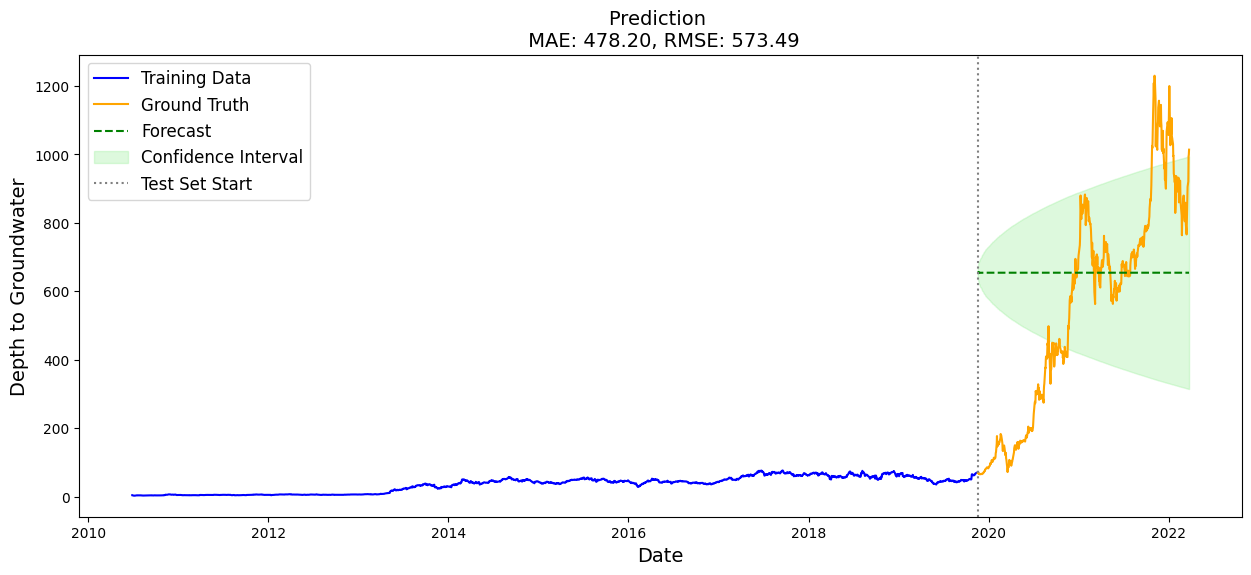

In [59]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert pred_ci to DataFrame with the correct index, using the test set index
pred_ci = pd.DataFrame(pred_ci, index=test.index, columns=["Lower Bound", "Upper Bound"])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot actual training data with thicker line
sns.lineplot(x=train.index, y=train, ax=ax, label="Training Data", color="blue", linewidth=1.5)

# Plot actual values from the validation/test set with thicker line
sns.lineplot(x=test.index, y=test, ax=ax, label="Ground Truth", color="orange", linewidth=1.5)

# Plot forecast with dashed line and thicker width
sns.lineplot(x=test.index, y=pred_mean, ax=ax, label="Forecast", color="green", linewidth=1.5, linestyle="--")

# Plot narrower confidence intervals for more clarity
ax.fill_between(pred_ci.index, pred_ci["Lower Bound"], pred_ci["Upper Bound"],
                color="lightgreen", alpha=0.3, label="Confidence Interval")

# Add a vertical line to mark the start of the test set
ax.axvline(x=test.index[0], color='grey', linestyle=':', linewidth=1.5, label="Test Set Start")

# Add title and labels with improved readability
ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Depth to Groundwater', fontsize=14)

# Show legend with better placement
ax.legend(loc='upper left', fontsize=12)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


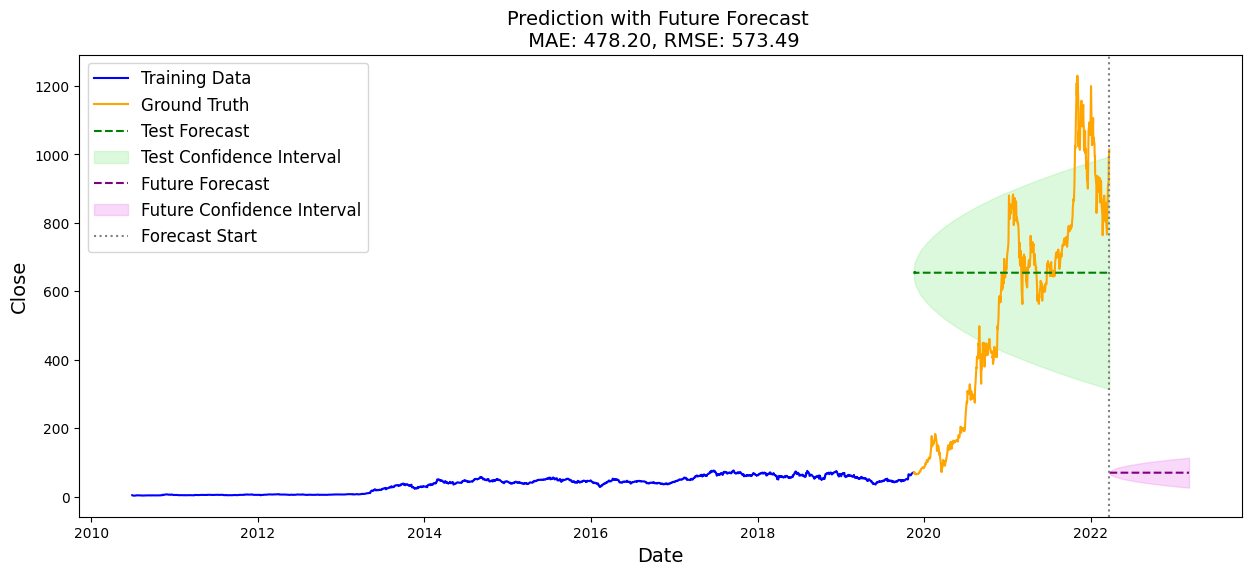

In [62]:
# Forecast 30 days beyond the test data
forecast_horizon = 350
future_forecast = results.get_forecast(steps=forecast_horizon)
future_pred_mean = future_forecast.predicted_mean
future_pred_ci = future_forecast.conf_int()

# Extend the index of the prediction and confidence interval DataFrames for correct plotting
future_pred_mean.index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
future_pred_ci.index = future_pred_mean.index

# Plotting with the extended forecast
fig, ax = plt.subplots(figsize=(15, 6))

# Plot training data
sns.lineplot(x=train.index, y=train, ax=ax, label="Training Data", color="blue", linewidth=1.5)

# Plot test/ground truth data
sns.lineplot(x=test.index, y=test, ax=ax, label="Ground Truth", color="orange", linewidth=1.5)

# Plot forecast for test period
sns.lineplot(x=test.index, y=pred_mean, ax=ax, label="Test Forecast", color="green", linewidth=1.5, linestyle="--")

# Plot confidence intervals for test forecast
ax.fill_between(pred_ci.index, pred_ci["Lower Bound"], pred_ci["Upper Bound"], color="lightgreen", alpha=0.3, label="Test Confidence Interval")

# Plot future forecast
sns.lineplot(x=future_pred_mean.index, y=future_pred_mean, ax=ax, label="Future Forecast", color="purple", linewidth=1.5, linestyle="--")

# Plot confidence intervals for future forecast
ax.fill_between(future_pred_ci.index, future_pred_ci["lower Close"], future_pred_ci["upper Close"], color="violet", alpha=0.3, label="Future Confidence Interval")

# Add a vertical line to mark the start of the forecast period
ax.axvline(x=test.index[-1], color='grey', linestyle=':', linewidth=1.5, label="Forecast Start")

# Set labels and title
ax.set_title(f'Prediction with Future Forecast \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Close', fontsize=14)

# Show legend
ax.legend(loc='upper left', fontsize=12)
plt.show()
